In [39]:
import pandas as pd
weather= pd.read_csv("Weather Data_Set.csv", index_col="date_time")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

weather

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
01-01-2009 00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
01-01-2009 01:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
01-01-2009 02:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
01-01-2009 03:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
01-01-2009 04:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01-01-2020 19:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,13,21,53,61,0.0,1019,13,8,74,11
01-01-2020 20:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,12,22,39,61,0.0,1020,13,9,81,11
01-01-2020 21:00,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,6:57 AM,...,12,23,25,62,0.0,1020,13,10,88,11


In [2]:
weather.apply(pd.isnull).sum()/weather.shape[0]

maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
dtype: float64

In [3]:
core_weather= weather[["maxtempC","mintempC", "HeatIndexC", "WindChillC", "humidity"]].copy()


In [4]:
core_weather.columns=["max_temp", "min_temp", "heat_index", "humidity", "wind_chill"]   

In [5]:
core_weather

,max_temp,min_temp,heat_index,humidity,wind_chill
date_time,,,,,
01-01-2009 00:00,24,10,12,11,50
01-01-2009 01:00,24,10,13,12,52
01-01-2009 02:00,24,10,13,12,55
01-01-2009 03:00,24,10,13,12,57
01-01-2009 04:00,24,10,14,14,54
...,...,...,...,...,...
01-01-2020 19:00,15,11,13,13,61
01-01-2020 20:00,15,11,13,12,61
01-01-2020 21:00,15,11,13,12,62


In [6]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

max_temp      0.0
min_temp      0.0
heat_index    0.0
humidity      0.0
wind_chill    0.0
dtype: float64

In [7]:
core_weather["humidity"].value_counts()

humidity
30    5109
29    5077
28    4931
31    4915
32    4609
27    4511
33    4460
34    4187
35    3950
26    3655
36    3526
25    3261
24    2992
37    2983
23    2784
38    2609
22    2508
21    2405
19    2321
20    2274
18    2237
39    2232
17    2174
16    1895
40    1880
41    1751
42    1510
15    1508
43    1286
14    1246
13    1018
44    1000
45     761
12     625
46     575
47     411
11     407
10     235
48     206
9      124
49     100
50      64
8       54
7       22
6       15
51      14
53       5
5        5
52       2
54       2
4        1
Name: count, dtype: int64

In [8]:
core_weather.dtypes

max_temp      int64
min_temp      int64
heat_index    int64
humidity      int64
wind_chill    int64
dtype: object

In [9]:
core_weather.index

Index(['01-01-2009 00:00', '01-01-2009 01:00', '01-01-2009 02:00',
       '01-01-2009 03:00', '01-01-2009 04:00', '01-01-2009 05:00',
       '01-01-2009 06:00', '01-01-2009 07:00', '01-01-2009 08:00',
       '01-01-2009 09:00',
       ...
       '01-01-2020 14:00', '01-01-2020 15:00', '01-01-2020 16:00',
       '01-01-2020 17:00', '01-01-2020 18:00', '01-01-2020 19:00',
       '01-01-2020 20:00', '01-01-2020 21:00', '01-01-2020 22:00',
       '01-01-2020 23:00'],
      dtype='object', name='date_time', length=96432)

In [12]:
core_weather.index

Index(['01-01-2009 00:00', '01-01-2009 01:00', '01-01-2009 02:00',
       '01-01-2009 03:00', '01-01-2009 04:00', '01-01-2009 05:00',
       '01-01-2009 06:00', '01-01-2009 07:00', '01-01-2009 08:00',
       '01-01-2009 09:00',
       ...
       '01-01-2020 14:00', '01-01-2020 15:00', '01-01-2020 16:00',
       '01-01-2020 17:00', '01-01-2020 18:00', '01-01-2020 19:00',
       '01-01-2020 20:00', '01-01-2020 21:00', '01-01-2020 22:00',
       '01-01-2020 23:00'],
      dtype='object', name='date_time', length=96432)

<Axes: xlabel='date_time'>

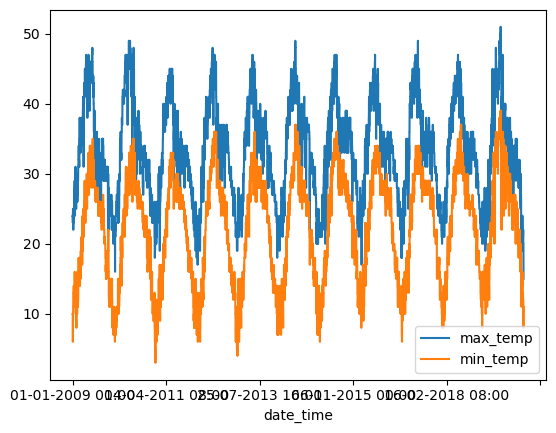

In [11]:
core_weather[["max_temp", "min_temp"]].plot()


In [13]:
core_weather["humidity"]

date_time
01-01-2009 00:00    11
01-01-2009 01:00    12
01-01-2009 02:00    12
01-01-2009 03:00    12
01-01-2009 04:00    14
                    ..
01-01-2020 19:00    13
01-01-2020 20:00    12
01-01-2020 21:00    12
01-01-2020 22:00    12
01-01-2020 23:00    12
Name: humidity, Length: 96432, dtype: int64

<Axes: xlabel='date_time'>

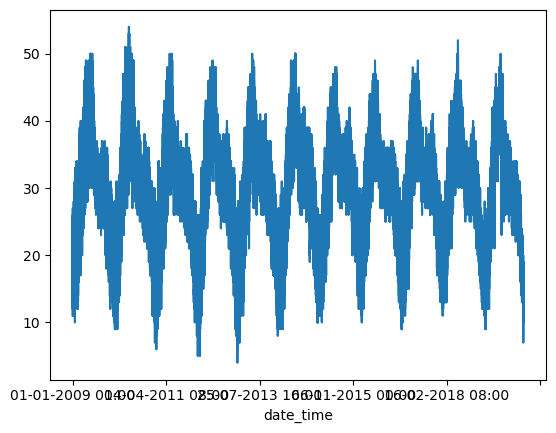

In [14]:
core_weather["humidity"].plot()

In [73]:
max_temp2d = weather['maxtempC'].values.reshape(-1,1)

In [78]:
core_weather["target"] = core_weather.shift(-1)["max_temp"]

In [80]:
core_weather = core_weather.iloc[:-1,:].copy()

In [81]:
core_weather

,max_temp,min_temp,heat_index,humidity,wind_chill,target
date_time,,,,,,
01-01-2009 00:00,24,10,12,11,50,24.0
01-01-2009 01:00,24,10,13,12,52,24.0
01-01-2009 02:00,24,10,13,12,55,24.0
01-01-2009 03:00,24,10,13,12,57,24.0
01-01-2009 04:00,24,10,14,14,54,24.0
...,...,...,...,...,...,...
01-01-2020 16:00,15,11,14,13,61,15.0
01-01-2020 17:00,15,11,14,13,61,15.0
01-01-2020 18:00,15,11,14,13,60,15.0


In [82]:
from sklearn.linear_model import Ridge
reg= Ridge(alpha=0.1)

In [92]:
predictors =["humidity","max_temp","min_temp"]

In [93]:
train= core_weather.loc[:"31-12-2015 23:00"]

In [96]:
test= core_weather.loc["01-01-2016 00:00":]

In [97]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [98]:
predictions = reg.predict(test[predictors])

In [65]:
from sklearn.metrics import mean_absolute_error

In [100]:
mean_absolute_error(test["target"], predictions)

0.06407007028853086

In [103]:
combined=pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual", "predictions"]

In [104]:
combined

,actual,predictions
date_time,,
01-01-2016 00:00,26.0,25.991917
01-01-2016 01:00,26.0,25.991917
01-01-2016 02:00,26.0,25.989246
01-01-2016 03:00,26.0,25.986574
01-01-2016 04:00,26.0,25.991917
...,...,...
01-01-2020 16:00,15.0,15.039162
01-01-2020 17:00,15.0,15.039162
01-01-2020 18:00,15.0,15.039162


<Axes: xlabel='date_time'>

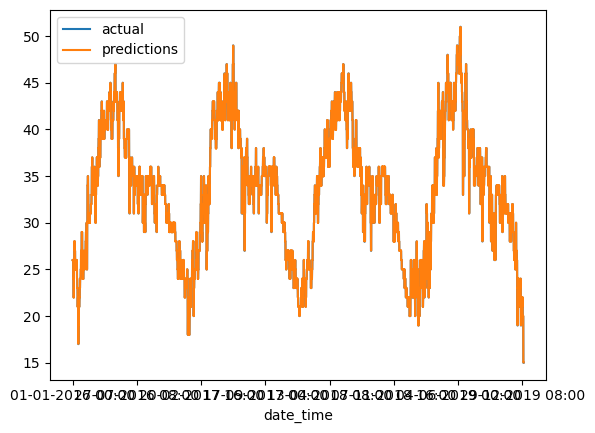

In [105]:
combined.plot()

In [106]:
reg.coef_

array([2.67165025e-03, 9.95069991e-01, 8.21026629e-04])

In [110]:
def create_predictions(predictors,core_weather, reg):
    train= core_weather.loc[:"31-12-2015 23:00"]
    test= core_weather.loc["01-01-2016 00:00":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error= mean_absolute_error(test["target"], predictions)
    combined=pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "predictions"]
    return error, combined

In [111]:
core_weather["day_max"]=core_weather["max_temp"].rolling(24).mean()

In [112]:
core_weather

,max_temp,min_temp,heat_index,humidity,wind_chill,target,day_max
date_time,,,,,,,
01-01-2009 00:00,24,10,12,11,50,24.0,NaN
01-01-2009 01:00,24,10,13,12,52,24.0,NaN
01-01-2009 02:00,24,10,13,12,55,24.0,NaN
01-01-2009 03:00,24,10,13,12,57,24.0,NaN
01-01-2009 04:00,24,10,14,14,54,24.0,NaN
...,...,...,...,...,...,...,...
01-01-2020 16:00,15,11,14,13,61,15.0,16.458333
01-01-2020 17:00,15,11,14,13,61,15.0,16.250000
01-01-2020 18:00,15,11,14,13,60,15.0,16.041667


In [113]:
core_weather.corr()["target"]

max_temp      0.998526
min_temp      0.880647
heat_index    0.815482
humidity      0.873206
wind_chill   -0.456788
target        1.000000
day_max       0.987394
Name: target, dtype: float64

In [114]:
combined["diff"] =(combined["actual"]- combined["predictions"]).abs()

In [116]:
combined.sort_values("diff",ascending=False).head()

,actual,predictions,diff
date_time,,,
10-07-2017 23:00,27.0,36.984734,9.984734
15-04-2019 23:00,34.0,43.974881,9.974881
20-08-2019 23:00,28.0,36.993570,8.993570
18-06-2019 23:00,33.0,41.982891,8.982891
26-01-2017 23:00,20.0,27.990893,7.990893
